# Proyecto: Simulación de Movimiento Browniano

---

Creador: José Julián López Rodríguez

Sobre este proyecto: Este proyecto formó parte de mi formación académica mientras cursaba la materia de Métodos Numéricos. Se nos pidió crear un cálculo o simular un fenómeno físico en nuestras computadoras.

En este proyecto se decidió simular el movimiento browniano, observado por primera vez en 1827 por el biólogo y botánico escocés Robert Brown. Este fenómeno fue observado inicialmente en una partícula de polen sobre el agua, la cual se movía aleatoriamente. En ese momento, no fue posible determinar por qué el polen se movía de esa manera. En un principio se planteó la posibilidad de que el polen pudiera contener algo de vida que lo hiciera moverse de esa forma; sin embargo, al repetir el experimento con polen de épocas anteriores, donde no podría existir actualmente alguna forma de vida, se volvió a observar este movimiento errático en la partícula de polen.

No fue hasta 1905 cuando el científico alemán Albert Einstein detalló el mecanismo que provoca este movimiento. En su artículo, explicó que las partículas de polen están siendo movidas debido a las colisiones de las moléculas del agua golpeándolas en todas direcciones, lo que transmite energía cinética y provoca que el polen se mueva de esa forma tan errática. En 1908, este fenómeno fue confirmado por el científico francés Jean Perrin, lo cual lo hizo merecedor del Premio Nobel en 1926.

En este proyecto se realizarán dos simulaciones: una en la que se crearán "n" partículas de polen que se moverán aleatoriamente, y otra simulando las moléculas de agua como esferas de radio finito golpeando una partícula de polen, similar a las simulaciones actuales que se encuentran en páginas como Wikipedia.

Artículo de Wikipedia sobre el movimiento browniano: [Movimiento browniano - Wikipedia](https://es.wikipedia.org/wiki/Movimiento_browniano)

# ***Creditos***


La simulaciones a continuacion estan basadas en dos proyectos 

La primera en *A brief introduction to Brownian motion and diffusion*  hecha por **Andreas S. Krogen, Jonas Tjemsland, Håkon W. Ånes y Jon Andreas Støvneng** para simular el movimiento browniano

La segunda esta basada en *Billiard Balls and the Boltzmann Distribution in Python* hecha por **Lukepolson** para simular un gas ideal 

## Primera simulacion

In [1]:
import numpy as np #Es para usar array
import matplotlib.pyplot as plt #Nos sirve para graficar
from scipy.special import binom #Nos ayuda a calcular el Binomio
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
from itertools import combinations
import math 
import random #Nos sirve para generar numeros aleatorios utilizados en la funcion 'creador_particulas'

In [2]:
def posicion_probabilidad(N,p,d): 
    '''
      Parametros
        N = (int) Numero de pasos netos que dara la 
              particula (Entero y mayor a cero).                                                                
        
        p = (float) Probabilidad de que un paso sea hacia la derecha (entre 0 y 1).                                                                                                 
        
        d = (float) Distancia que avanza en cada paso (no negativo).

      Arroja
        -(array) Que contiene las posibles cordenadas en X

        -(array) que contiene la probabilidad de que de este en la cordenada Xi                                                           
    '''

    n = np.arange(0, N+1) # n es un areglo de los numeros enteros [0,N]
    P = binom(N, n) * p**n * (1 - p)**(N - n) # P es un areglo que contiene la probabilidad de que de n pasos a la derecha
    x = (2*n - N)*d # x es un areglo que contiene la posicion final despues de dar n pasos
    return (x, P)


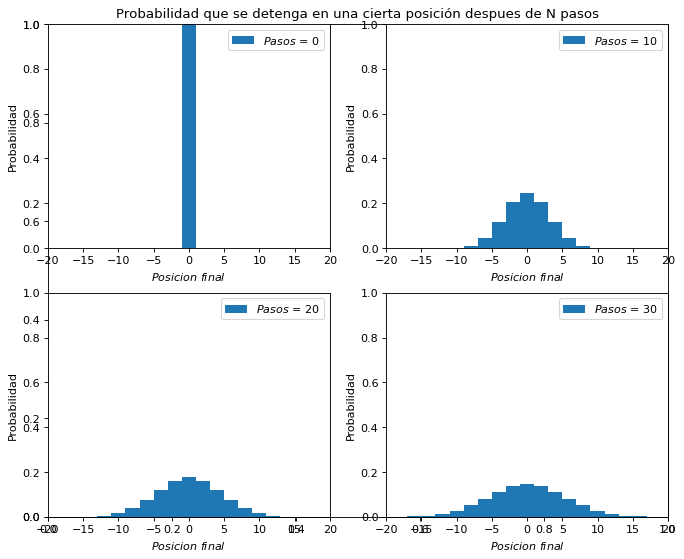

In [3]:
#Hacemos 4 graficas para visualizar esto. La primera grafica sera de N=0 y aumentara de 10 en 10
fig = plt.figure(figsize=(10, 8), dpi=80) #Declaramos la figura
plt.title('Probabilidad que se detenga en una cierta posición despues de N pasos')#le agragamos un titulo

Eje_x = [None]*4
Eje_y = [None]*4
ax = [None]*4

for i in range (0,4):
    N = 10*i
    # Declaramos los valores para los ejes
    Eje_x[i] = posicion_probabilidad(N,.5,1)[0] 
    Eje_y[i] = posicion_probabilidad(N,.5,1)[1] 
    #Creamos M graficas
    ax[i] = fig.add_subplot(2, 2, i+1)
    ax[i].bar(Eje_x[i], Eje_y[i], width=2.0, align='center')

    ## Colocamos los limites de los ejes
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([-20,20])

    ## Colocamos etiquetas a los ejes
    ax[i].set_xlabel('$Posicion$' + ' ' + '$final$')
    ax[i].set_ylabel('Probabilidad')
    
    ## Colocamos un pequeño recuadro con el numero de pasos
    ax[i].legend(['$Pasos$ = {0}'.format(N)])

In [4]:
def creador_de_particulas(N,R):
  '''
    Parametros
      N (int) Numero de particulas que el quiere generar
   
      R (float) Radio de la 'Nube de particulas'
    Arroja
      -(array) un array que contiene N cordenadas en el eje x

      -(array) un array que contiene N cordenadas en el eje y        
  '''  
  angulos=2*np.pi*np.random.rand(N) #Creamos un array que contenga N angulos aleatorios entre 0 y pi
  radios= R*np.random.rand(N)#Creamos un array que contenga N radios aleatorios menores a R
  cordenadasx=radios*np.cos(angulos)#Se caucula la distancia en x. Como el angulo y el radio son aleatorios entonces la cordenada en x tambien es aleatoria
  cordenadasy=radios*np.sin(angulos)#Se calcula la distancia en y. Como el angulo y el radio son aleatorios entonces la cordenada en y tambien es aleatoria
  return(cordenadasx,cordenadasy) 

def evolucionador_de_particulas(cordenadasx,cordenadasy,d,pr,pu,corrientex,corrientey):
  '''
     Parametros
       -cordenadasx (array) posiciones en x
       -cordenadasy (array) posiciones en y
       -d           (float) la longitud de cada paso
       -pr          (float) probabilidad que de un paso a la derecha (positivo y menor a 1)
       -pu          (float) probabilidad que de un paso hacia arriva (positivo y menor a 1)
       -corrientex  (float) (aun no programado)
       -corrientey  (float) (aun no programado)
     Arroja 
       - (array) un array con las cordenadas x evolucionadas 
       - (array) un array con las cordenadas y evolucionadas 
  '''  
  if cordenadasx.size != cordenadasy.size:    #Verificamos que existan las mismas cordenadas en x y en y
    if cordenadasx.size<cordenadasy.size:
      print('Verificar la entrada, hay mas cordenadas en el eje y')
    else:
      print('Verificar la entrada, hay mas cordenadas en el eje x')

  arrayaleatorio=np.random.rand(cordenadasx.size) #Se crea un array aleatorio de dimencion las mismas que el numero de cordenada en x

  for i, pasoDerecha in enumerate(arrayaleatorio < pr):#Se decide si el paso sera a la derecha o hacia la izquierda dependiendo del array aleatorio
    if pasoDerecha:
      cordenadasx[i]=d+cordenadasx[i]
    else:
      cordenadasx[i]=-d+cordenadasx[i]

  arrayaleatorio=np.random.rand(cordenadasy.size) #Se renueva el array aleatorio de dimencion las mismas que el numero de cordenada en y

  for i, pasoArriba in enumerate(arrayaleatorio < pr): #Se decide si el paso sera a la derecha o hacia la izquierda dependiendo del array aleatorio
    if pasoArriba:
      cordenadasy[i]=d+cordenadasy[i]
    else:
      cordenadasy[i]=-d+cordenadasy[i]      
  
  cordenadasx += corrientex*d # se le suma la corriente en x
  cordenadasy += corrientey*d # se le suma la corriente en y
  
  return (cordenadasx,cordenadasy)

def impresor_de_datos(N,R,d,pr,pu,corrientex,corrientey,evoluciones): 
  '''
     Parametros
       -N            (int)  Numero de particulas
       -R           (float) Radio de la nube de particulas
       -d           (float) la longitud de cada paso
       -pr          (float) probabilidad que de un paso a la derecha (positivo y menor a 1)
       -pu          (float) probabilidad que de un paso hacia arriva (positivo y menor a 1)
       -corrientex  (float) magnitud de la corriente en el eje x
       -corrientey  (float) magnitud de la corriente en el eje y
       -Evoluciones  (int)  Numero de evoluciones que el usuario quiere analizar 
     Arroja 
       - solo imprime con un print
  '''  
  ab=creador_de_particulas(N,R) #Creamos las particulas

  a=ab[0] #Coordenada X de las particulas
  b=ab[1] #Coordenada Y de las particulas

  print(str(list(a)) + ','+ str(list(b))) #Se imprimen los datos
  for i in range  (0,evoluciones+1):   
      c=evolucionador_de_particulas(a,b,d,pr,pu,corrientex,corrientey)
      print(str(list(c[0])) + ','+ str(list(c[1])))
      a=c[0]
      b=c[1]


def graficadora_de_evolucion(N,R,d,pr,pu,corrientex,corrientey,evoluciones):
  '''
     Parametros
       -N            (int)  Numero de particulas
       -R           (float) Radio de la nube de particulas
       -d           (float) la longitud de cada paso
       -pr          (float) probabilidad que de un paso a la derecha (positivo y menor a 1)
       -pu          (float) probabilidad que de un paso hacia arriva (positivo y menor a 1)
       -corrientex  (float) magnitud de la corriente en el eje x
       -corrientey  (float) magnitud de la corriente en el eje y
       -Evoluciones  (int)  Numero de evoluciones que el usuario quiere analizar 
     Arroja 
       - solo imprime (prints)
  '''  
  ab=creador_de_particulas(N,R)

  a=ab[0]
  b=ab[1] 

  for i in range  (0,evoluciones+1): #se coloca un for para poder colocar diferentes titulos dependiendo la imagen
    if i==0:
      print('Partículas generadas '+str(list(a)) + ','+ str(list(b))) #se imprimen las cordenadas iniciales
 
      x_avg, y_avg = np.average(a), np.average(b) #Se calcula el promeido de el eje x y el promedio en el eje y
      x_var = np.sum((a - x_avg)**2) / N #se calcula la varianaza en el eje x
      y_var = np.sum((b - y_avg)**2) / N #se calcula la varianza en el eje y

      print( ) #esto es solo para dejar un espacio entre cada impresion
      print('x prom '+str(round(x_avg,2))+', y prom '+str(round(y_avg,2))+ ' Var(x) ' + str(round(x_var,2)) + ' Var(y) '+  str(round(y_var,2)))#Se imprime el resultado


      fig = plt.figure(figsize=(5.6, 5.6)) #Declaramos una nueva imagen
      plt.title("Particulas generadas ",fontsize=20) #Colocamos un titulo
      plt.xlabel("Eje x",fontsize=18) #colocamos los ejes
      plt.ylabel("Eje y",fontsize=18)
      plt.plot(a,b, "o") #diseñamos cada puntito
      plt.xlim(-1.5,1.5) #le damos el tamaño a los ejes
      plt.ylim(-1.5,1.5)
      plt.show()  #mostramos
    else:     
      c=evolucionador_de_particulas(a,b,d,pr,pu,corrientex,corrientey) #se le manda a la funcion evolucionador de particulas
      print('Posición de las parículas despues de '+str(i)+' evoluciones '+str(list(c[0])) + ','+ str(list(c[1]))) #se imprimen las nuevas coordenadas
      a=c[0] #se guardan las nuevas cordenadas
      b=c[1]

      x_avg, y_avg = np.average(a), np.average(b) #Se calcula en nuevo promedio de posiciones
      x_var = np.sum((a - x_avg)**2) / N #se calcula la nueva varianza en el eje x
      y_var = np.sum((b - y_avg)**2) / N #se calcula la nueva varianza en el eje y

      print( )
      print('x prom '+str(round(x_avg,2))+', y prom '+str(round(y_avg,2))+ ' Var(x) ' + str(round(x_var,2)) + ' Var(y) '+  str(round(y_var,2)))  #Se imprime el resultado

      fig = plt.figure(figsize=(5.6, 5.6))
      plt.title("Evolución "+ str(i),fontsize=20)
      plt.xlabel("Eje x",fontsize=18)
      plt.ylabel("Eje y",fontsize=18)
      plt.plot(a,b, "o")
      plt.xlim(-1.5,1.5)
      plt.ylim(-1.5,1.5)
      plt.show()           

### Resultados de la primera simulación

Partículas generadas [0.1287820540817691, 0.10677959673076269, 0.19555184492937872, -0.013442653022928725, -0.036190169807981405, 0.18291385256128828, 0.517273926143866, -0.012465289397582069, 0.1875969444895257, 0.8993698733259605, -0.38443713129139745, 0.6346867247814983, 0.0479298040058963, -0.6136749762143187, 0.12755346869954617, 0.04629961426179641, 0.5133141420499765, 0.09113772199686113, -0.6569773839060642, -0.753872590921927, 0.5249668592552579, 0.3768035538800161, -0.04934068915501425, 0.46568840046648424, -0.8017005911409963, 0.6451686582309455, 0.4878267816051445, 0.14100995956692133, -0.29768995613053356, 0.04027541533804124, -0.052988510625876666, -0.2582636272300697, -0.06261117052316417, -0.16082015041678638, -0.6469296443831004, -0.22224895773994643, -0.07468897447580007, -0.07126668201017322, 0.5093571307430133, -0.3179671455448029, -0.5663972517106205, -0.09355141672592965, 0.1455850653809778, -0.9527950230074718, 0.4372185319555944, -0.10009241714046087, -0.4964782

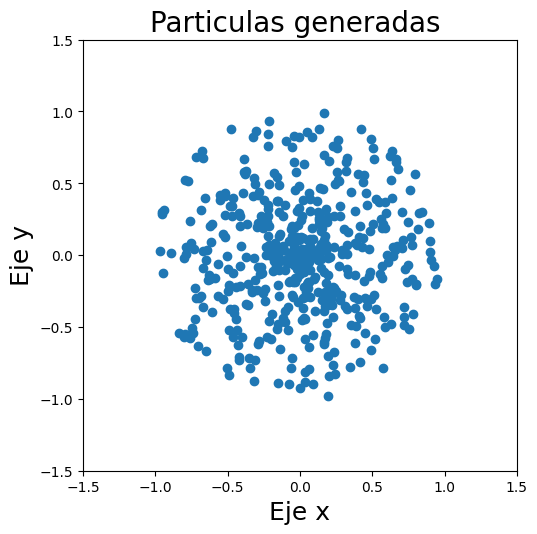

Posición de las parículas despues de 1 evoluciones [0.028782054081769093, 0.20677959673076268, 0.2955518449293787, 0.08655734697707128, -0.1361901698079814, 0.2829138525612883, 0.617273926143866, -0.11246528939758207, 0.2875969444895257, 0.9993698733259605, -0.28443713129139747, 0.5346867247814984, -0.05207019599410371, -0.7136749762143186, 0.02755346869954617, -0.0537003857382036, 0.4133141420499765, 0.19113772199686113, -0.7569773839060642, -0.6538725909219271, 0.4249668592552579, 0.47680355388001605, 0.050659310844985754, 0.5656884004664843, -0.9017005911409963, 0.5451686582309455, 0.5878267816051445, 0.24100995956692134, -0.19768995613053356, 0.14027541533804125, -0.15298851062587668, -0.35826362723006966, 0.03738882947683583, -0.06082015041678637, -0.5469296443831004, -0.12224895773994643, 0.025311025524199934, -0.17126668201017323, 0.6093571307430132, -0.21796714554480287, -0.4663972517106205, -0.19355141672592965, 0.045585065380977785, -0.8527950230074718, 0.33721853195559437, -

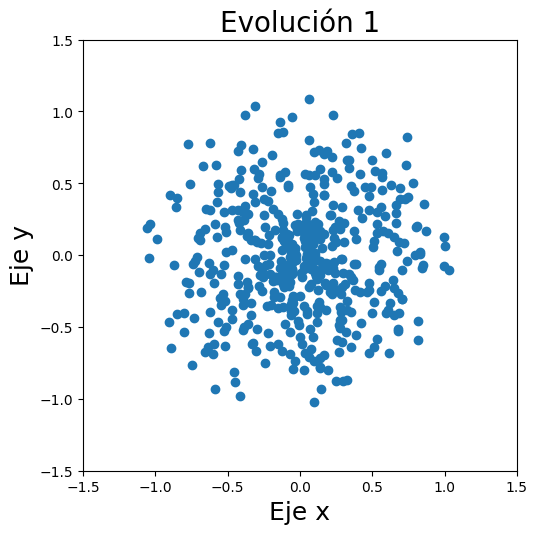

Posición de las parículas despues de 2 evoluciones [-0.07121794591823091, 0.10677959673076268, 0.1955518449293787, 0.18655734697707127, -0.2361901698079814, 0.1829138525612883, 0.517273926143866, -0.21246528939758208, 0.38759694448952575, 1.0993698733259605, -0.38443713129139745, 0.6346867247814983, -0.1520701959941037, -0.6136749762143187, 0.12755346869954617, 0.04629961426179641, 0.31331414204997654, 0.29113772199686117, -0.6569773839060642, -0.753872590921927, 0.3249668592552579, 0.3768035538800161, 0.15065931084498577, 0.4656884004664843, -0.8017005911409963, 0.44516865823094554, 0.6878267816051444, 0.3410099595669214, -0.09768995613053355, 0.24027541533804125, -0.2529885106258767, -0.2582636272300697, -0.06261117052316417, -0.16082015041678638, -0.6469296443831004, -0.22224895773994643, 0.12531102552419993, -0.07126668201017322, 0.7093571307430132, -0.11796714554480286, -0.5663972517106205, -0.09355141672592965, -0.05441493461902222, -0.7527950230074718, 0.43721853195559435, -0.30

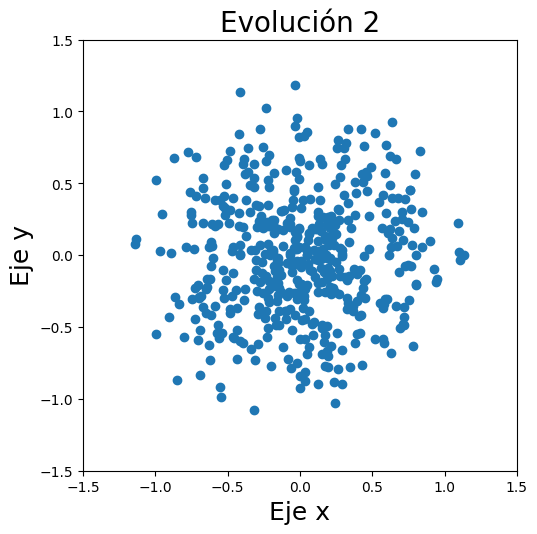

Posición de las parículas despues de 3 evoluciones [-0.17121794591823092, 0.0067795967307626714, 0.09555184492937868, 0.28655734697707125, -0.1361901698079814, 0.2829138525612883, 0.617273926143866, -0.11246528939758207, 0.48759694448952573, 1.1993698733259606, -0.4844371312913974, 0.5346867247814984, -0.0520701959941037, -0.5136749762143187, 0.22755346869954618, -0.0537003857382036, 0.4133141420499765, 0.19113772199686116, -0.5569773839060642, -0.6538725909219271, 0.4249668592552579, 0.47680355388001605, 0.25065931084498577, 0.3656884004664843, -0.9017005911409963, 0.34516865823094556, 0.7878267816051444, 0.24100995956692137, 0.002310043869466455, 0.14027541533804125, -0.35298851062587666, -0.35826362723006966, -0.16261117052316418, -0.2608201504167864, -0.5469296443831004, -0.32224895773994644, 0.22531102552419993, -0.17126668201017323, 0.6093571307430132, -0.21796714554480287, -0.6663972517106205, -0.19355141672592965, 0.045585065380977785, -0.6527950230074718, 0.5372185319555943, -

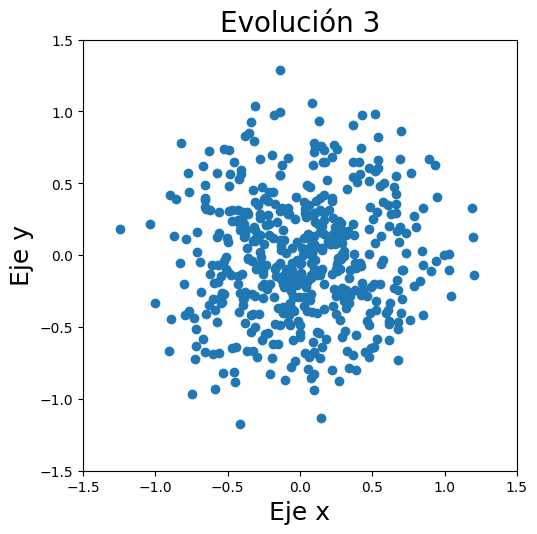

Posición de las parículas despues de 4 evoluciones [-0.07121794591823091, 0.10677959673076268, -0.0044481550706213235, 0.3865573469770712, -0.2361901698079814, 0.3829138525612883, 0.717273926143866, -0.21246528939758208, 0.5875969444895257, 1.2993698733259607, -0.38443713129139745, 0.4346867247814984, -0.1520701959941037, -0.4136749762143187, 0.12755346869954617, 0.04629961426179641, 0.5133141420499765, 0.09113772199686115, -0.6569773839060642, -0.5538725909219271, 0.3249668592552579, 0.3768035538800161, 0.3506593108449858, 0.26568840046648434, -0.8017005911409963, 0.44516865823094554, 0.8878267816051444, 0.14100995956692136, -0.09768995613053355, 0.04027541533804124, -0.2529885106258767, -0.2582636272300697, -0.2626111705231642, -0.3608201504167864, -0.44692964438310046, -0.4222489577399464, 0.12531102552419993, -0.07126668201017322, 0.5093571307430133, -0.11796714554480286, -0.5663972517106205, -0.29355141672592966, 0.1455850653809778, -0.5527950230074719, 0.6372185319555943, -0.5000

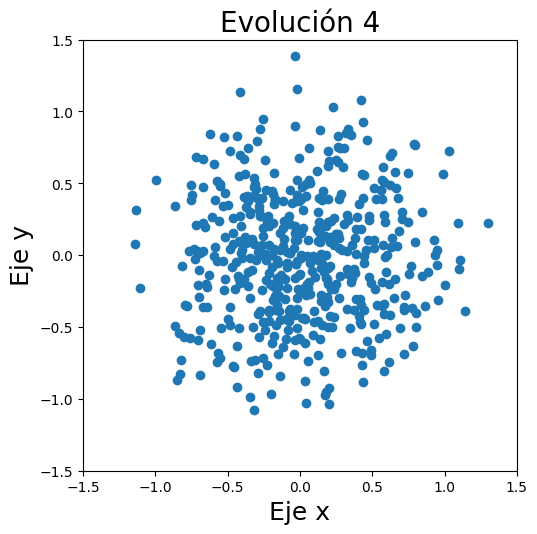

Posición de las parículas despues de 5 evoluciones [-0.17121794591823092, 0.0067795967307626714, 0.09555184492937868, 0.4865573469770712, -0.33619016980798144, 0.48291385256128827, 0.817273926143866, -0.3124652893975821, 0.48759694448952573, 1.3993698733259607, -0.4844371312913974, 0.3346867247814984, -0.25207019599410374, -0.5136749762143187, 0.22755346869954618, 0.1462996142617964, 0.4133141420499765, -0.008862278003138852, -0.7569773839060642, -0.6538725909219271, 0.4249668592552579, 0.2768035538800161, 0.4506593108449858, 0.3656884004664843, -0.7017005911409964, 0.5451686582309455, 0.9878267816051444, 0.24100995956692137, -0.19768995613053356, -0.05972458466195876, -0.35298851062587666, -0.15826362723006968, -0.16261117052316418, -0.46082015041678637, -0.3469296443831005, -0.5222489577399464, 0.22531102552419993, 0.028733317989826784, 0.6093571307430132, -0.01796714554480286, -0.4663972517106205, -0.19355141672592965, 0.045585065380977785, -0.6527950230074718, 0.5372185319555943, -

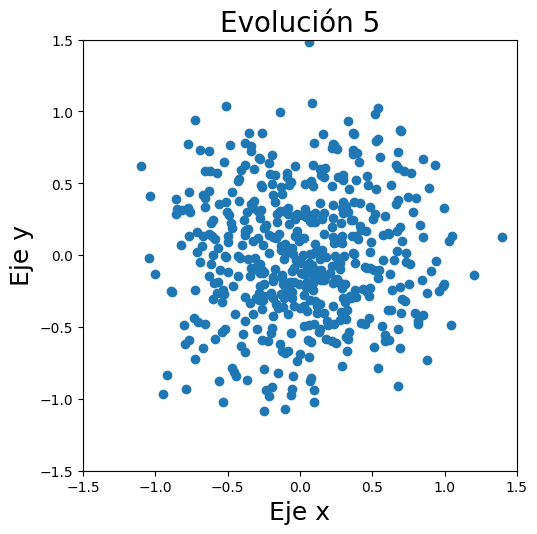

Posición de las parículas despues de 6 evoluciones [-0.2712179459182309, -0.09322040326923733, -0.0044481550706213235, 0.3865573469770712, -0.23619016980798144, 0.3829138525612883, 0.9172739261438659, -0.4124652893975821, 0.38759694448952575, 1.4993698733259608, -0.5844371312913974, 0.2346867247814984, -0.3520701959941037, -0.6136749762143187, 0.12755346869954617, 0.04629961426179641, 0.31331414204997654, -0.10886227800313886, -0.6569773839060642, -0.753872590921927, 0.3249668592552579, 0.1768035538800161, 0.3506593108449858, 0.4656884004664843, -0.6017005911409964, 0.6451686582309455, 0.8878267816051444, 0.3410099595669214, -0.09768995613053355, -0.15972458466195877, -0.2529885106258767, -0.2582636272300697, -0.2626111705231642, -0.5608201504167863, -0.44692964438310046, -0.4222489577399464, 0.12531102552419993, -0.07126668201017322, 0.5093571307430133, 0.08203285445519715, -0.36639725171062054, -0.09355141672592965, -0.05441493461902222, -0.7527950230074718, 0.6372185319555943, -0.50

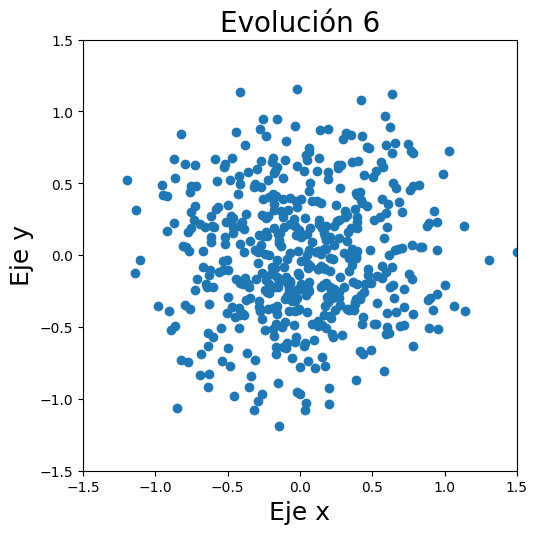

Posición de las parículas despues de 7 evoluciones [-0.1712179459182309, 0.0067795967307626714, 0.09555184492937868, 0.4865573469770712, -0.13619016980798143, 0.48291385256128827, 0.817273926143866, -0.3124652893975821, 0.2875969444895258, 1.599369873325961, -0.4844371312913974, 0.3346867247814984, -0.4520701959941037, -0.7136749762143186, 0.02755346869954617, -0.0537003857382036, 0.21331414204997654, -0.008862278003138852, -0.5569773839060642, -0.853872590921927, 0.22496685925525792, 0.2768035538800161, 0.2506593108449858, 0.5656884004664843, -0.7017005911409964, 0.5451686582309455, 0.9878267816051444, 0.44100995956692135, 0.002310043869466455, -0.2597245846619588, -0.35298851062587666, -0.35826362723006966, -0.36261117052316416, -0.46082015041678637, -0.3469296443831005, -0.5222489577399464, 0.02531102552419992, -0.17126668201017323, 0.6093571307430132, -0.01796714554480286, -0.4663972517106205, -0.19355141672592965, 0.045585065380977785, -0.6527950230074718, 0.7372185319555943, -0.4

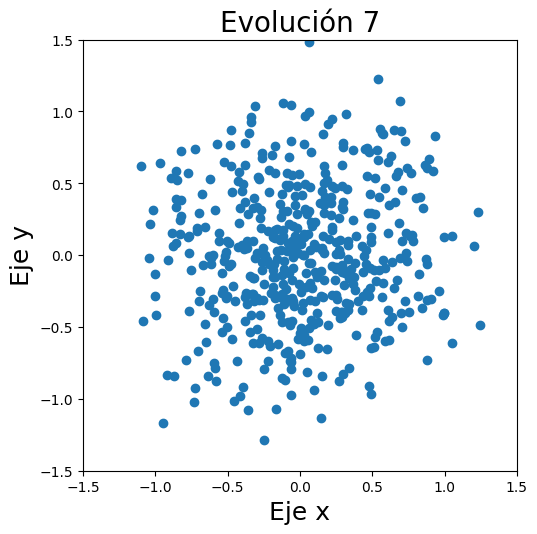

Posición de las parículas despues de 8 evoluciones [-0.2712179459182309, 0.10677959673076268, -0.0044481550706213235, 0.3865573469770712, -0.23619016980798144, 0.3829138525612883, 0.717273926143866, -0.2124652893975821, 0.38759694448952575, 1.699369873325961, -0.5844371312913974, 0.2346867247814984, -0.3520701959941037, -0.6136749762143187, 0.12755346869954617, 0.04629961426179641, 0.11331414204997653, 0.09113772199686115, -0.45697738390606424, -0.753872590921927, 0.12496685925525791, 0.1768035538800161, 0.3506593108449858, 0.6656884004664843, -0.6017005911409964, 0.6451686582309455, 0.8878267816051444, 0.5410099595669213, 0.10231004386946646, -0.3597245846619588, -0.45298851062587664, -0.2582636272300697, -0.46261117052316414, -0.5608201504167863, -0.24692964438310047, -0.6222489577399464, 0.12531102552419993, -0.27126668201017323, 0.7093571307430132, 0.08203285445519715, -0.5663972517106205, -0.09355141672592965, 0.1455850653809778, -0.5527950230074719, 0.6372185319555943, -0.5000924

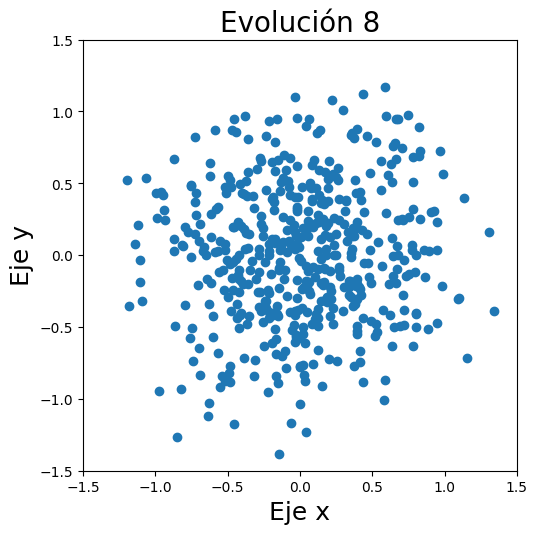

Posición de las parículas despues de 9 evoluciones [-0.1712179459182309, 0.20677959673076268, 0.09555184492937868, 0.28655734697707125, -0.13619016980798143, 0.48291385256128827, 0.817273926143866, -0.3124652893975821, 0.2875969444895258, 1.799369873325961, -0.6844371312913974, 0.1346867247814984, -0.25207019599410374, -0.5136749762143187, 0.02755346869954617, 0.1462996142617964, 0.21331414204997654, 0.19113772199686116, -0.5569773839060642, -0.853872590921927, 0.22496685925525792, 0.2768035538800161, 0.2506593108449858, 0.5656884004664843, -0.5017005911409964, 0.7451686582309455, 0.7878267816051444, 0.44100995956692135, 0.20231004386946647, -0.45972458466195876, -0.5529885106258766, -0.35826362723006966, -0.5626111705231641, -0.6608201504167863, -0.3469296443831005, -0.5222489577399464, 0.22531102552419993, -0.3712666820101732, 0.6093571307430132, 0.18203285445519715, -0.6663972517106205, 0.0064485832740703575, 0.2455850653809778, -0.4527950230074719, 0.7372185319555943, -0.4000924171

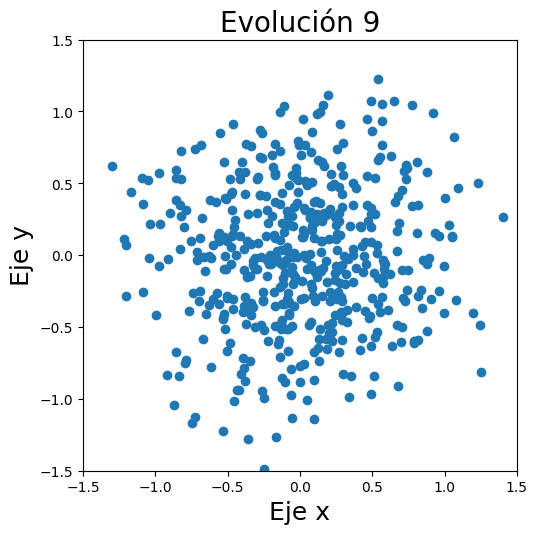

Posición de las parículas despues de 10 evoluciones [-0.07121794591823088, 0.3067795967307627, 0.1955518449293787, 0.3865573469770712, -0.036190169807981426, 0.3829138525612883, 0.9172739261438659, -0.2124652893975821, 0.18759694448952577, 1.699369873325961, -0.7844371312913974, 0.2346867247814984, -0.3520701959941037, -0.6136749762143187, -0.07244653130045384, 0.04629961426179641, 0.11331414204997653, 0.09113772199686115, -0.45697738390606424, -0.953872590921927, 0.3249668592552579, 0.3768035538800161, 0.15065931084498582, 0.4656884004664843, -0.6017005911409964, 0.6451686582309455, 0.6878267816051444, 0.5410099595669213, 0.10231004386946646, -0.3597245846619588, -0.6529885106258766, -0.2582636272300697, -0.6626111705231641, -0.7608201504167863, -0.44692964438310046, -0.6222489577399464, 0.12531102552419993, -0.27126668201017323, 0.5093571307430133, 0.08203285445519715, -0.7663972517106205, 0.10644858327407036, 0.1455850653809778, -0.3527950230074719, 0.6372185319555943, -0.5000924171

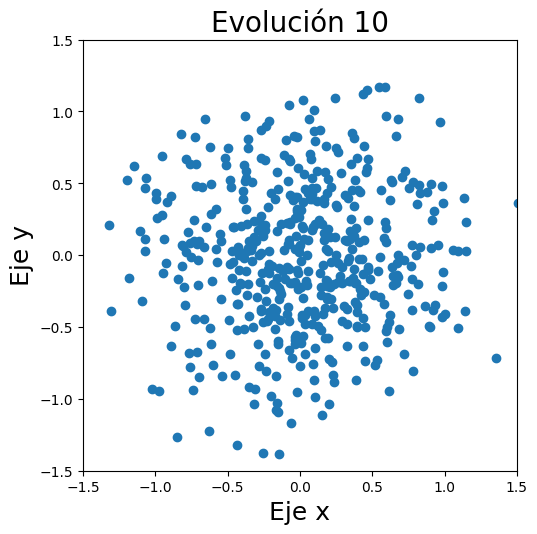

In [5]:
#Experimento 1 (sin corriente)
graficadora_de_evolucion(500,1,.1,.5,.5,0,0,10)

Es fascinante observar cómo las partículas migran de regiones con mayor densidad a regiones con menor densidad, reflejando así su comportamiento en el mundo real.

Partículas generadas [-0.33926406339810183, 0.02498938101198022, 0.26194415160185186, 0.30380347970747007, -0.06134237110856243, 0.45909655219442635, -0.11809022163988697, 0.25890557925928454, -0.2245355133902273, 0.04060349503063629, -0.2595194667500859, 0.5387469169802158, -0.01459164710443506, -0.3808918842647755, 0.14509520718662997, -0.531260245886385, -0.05132236690376453, 0.1989952506276963, 0.3074034189629248, -0.3420079158563173, 0.7587322323385347, -0.4218056413506196, -0.40758405314001844, -0.3200562714273498, 0.5091548841019459, -0.02322542024454896, 0.007631473214512197, -0.23288872631311316, -0.13100993860397026, 0.16402827181070484, -0.9506927763240977, -0.7538210632753418, -0.1360636295096509, 0.12768075851434543, -0.28553071974120925, -0.34727083670539577, -0.08758196262069061, 0.6344750899227457, -0.12594752803600456, 0.1274901105729778, 0.4213284629277751, 0.017855292748748173, -0.08488845376497312, 0.005716895070802139, -0.36007549675155653, -0.000710040840390523, 0

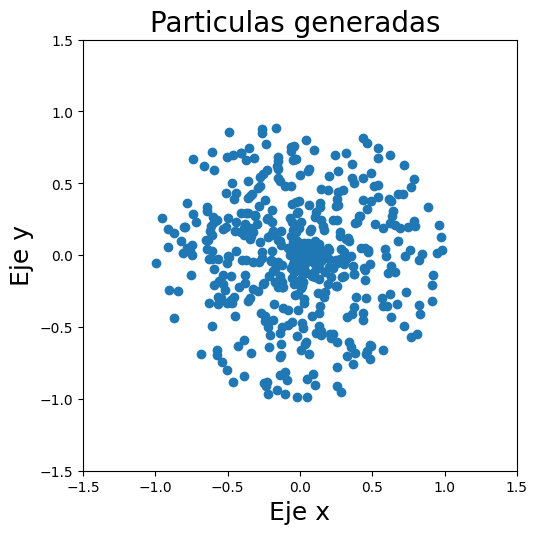

Posición de las parículas despues de 1 evoluciones [-0.13926406339810182, 0.024989381011980227, 0.26194415160185186, 0.30380347970747007, 0.13865762889143757, 0.45909655219442635, -0.11809022163988697, 0.45890557925928455, -0.2245355133902273, 0.2406034950306363, -0.25951946675008597, 0.5387469169802158, -0.014591647104435057, -0.3808918842647755, 0.14509520718662997, -0.531260245886385, 0.1486776330962355, 0.1989952506276963, 0.3074034189629248, -0.14200791585631728, 0.7587322323385347, -0.22180564135061961, -0.20758405314001846, -0.3200562714273498, 0.7091548841019458, -0.02322542024454896, 0.2076314732145122, -0.032888726313113154, -0.13100993860397026, 0.16402827181070484, -0.7506927763240977, -0.5538210632753419, -0.1360636295096509, 0.3276807585143454, -0.08553071974120924, -0.14727083670539576, 0.1124180373793094, 0.6344750899227457, 0.07405247196399545, 0.32749011057297783, 0.42132846292777504, 0.21785529274874818, 0.1151115462350269, 0.0057168950708021415, -0.1600754967515565,

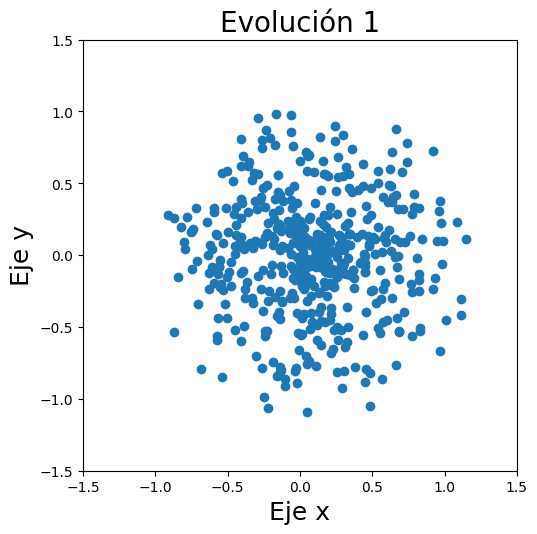

Posición de las parículas despues de 2 evoluciones [0.06073593660189819, 0.22498938101198024, 0.46194415160185187, 0.30380347970747007, 0.13865762889143757, 0.6590965521944263, 0.08190977836011304, 0.6589055792592845, -0.2245355133902273, 0.44060349503063634, -0.25951946675008597, 0.7387469169802158, -0.014591647104435057, -0.1808918842647755, 0.14509520718662997, -0.33126024588638503, 0.3486776330962355, 0.39899525062769625, 0.3074034189629248, -0.14200791585631728, 0.9587322323385347, -0.22180564135061961, -0.0075840531400184485, -0.12005627142734981, 0.7091548841019458, -0.02322542024454896, 0.4076314732145122, 0.16711127368688686, 0.06899006139602976, 0.16402827181070484, -0.7506927763240977, -0.5538210632753419, -0.1360636295096509, 0.5276807585143454, -0.08553071974120924, 0.05272916329460425, 0.3124180373793094, 0.6344750899227457, 0.27405247196399546, 0.32749011057297783, 0.42132846292777504, 0.21785529274874818, 0.3151115462350269, 0.0057168950708021415, 0.039924503248443516, 

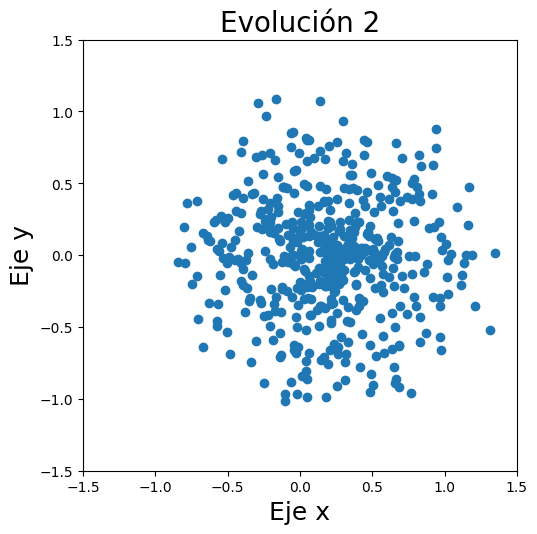

Posición de las parículas despues de 3 evoluciones [0.2607359366018982, 0.22498938101198024, 0.6619441516018518, 0.5038034797074701, 0.13865762889143757, 0.8590965521944263, 0.08190977836011304, 0.6589055792592845, -0.2245355133902273, 0.44060349503063634, -0.05951946675008596, 0.9387469169802157, -0.014591647104435057, -0.1808918842647755, 0.14509520718662997, -0.33126024588638503, 0.5486776330962355, 0.5989952506276962, 0.5074034189629247, 0.05799208414368273, 1.1587322323385347, -0.22180564135061961, 0.19241594685998156, 0.0799437285726502, 0.7091548841019458, 0.17677457975545105, 0.4076314732145122, 0.3671112736868869, 0.06899006139602976, 0.36402827181070485, -0.7506927763240977, -0.5538210632753419, -0.1360636295096509, 0.7276807585143453, -0.08553071974120924, 0.05272916329460425, 0.3124180373793094, 0.8344750899227457, 0.47405247196399547, 0.5274901105729778, 0.621328462927775, 0.21785529274874818, 0.5151115462350269, 0.0057168950708021415, 0.039924503248443516, 0.3992899591596

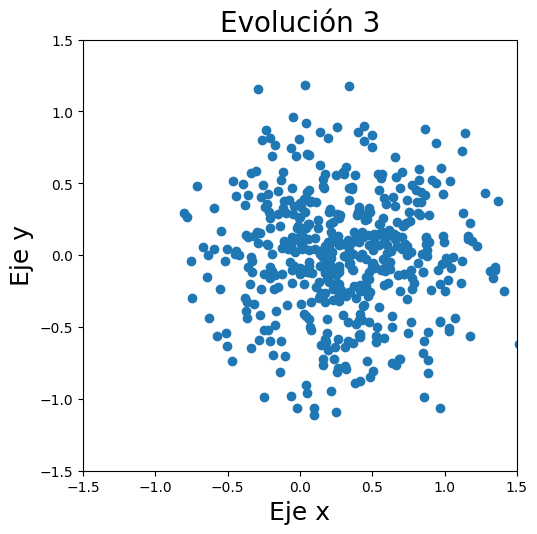

Posición de las parículas despues de 4 evoluciones [0.2607359366018982, 0.22498938101198024, 0.8619441516018518, 0.5038034797074701, 0.3386576288914376, 1.0590965521944262, 0.08190977836011304, 0.6589055792592845, -0.2245355133902273, 0.44060349503063634, -0.05951946675008596, 1.1387469169802158, -0.014591647104435057, -0.1808918842647755, 0.34509520718663, -0.13126024588638502, 0.7486776330962355, 0.5989952506276962, 0.5074034189629247, 0.25799208414368274, 1.1587322323385347, -0.021805641350619603, 0.3924159468599816, 0.0799437285726502, 0.9091548841019458, 0.37677457975545103, 0.6076314732145122, 0.3671112736868869, 0.26899006139602977, 0.5640282718107048, -0.5506927763240977, -0.5538210632753419, -0.1360636295096509, 0.7276807585143453, 0.11446928025879077, 0.05272916329460425, 0.3124180373793094, 0.8344750899227457, 0.6740524719639954, 0.5274901105729778, 0.621328462927775, 0.21785529274874818, 0.7151115462350268, 0.0057168950708021415, 0.23992450324844353, 0.5992899591596095, 0.5

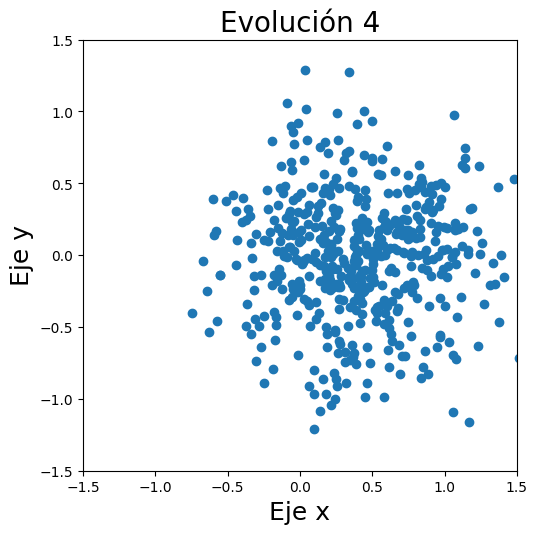

Posición de las parículas despues de 5 evoluciones [0.2607359366018982, 0.42498938101198025, 0.8619441516018518, 0.5038034797074701, 0.5386576288914375, 1.2590965521944264, 0.08190977836011304, 0.8589055792592845, -0.024535513390227276, 0.6406034950306363, -0.05951946675008596, 1.338746916980216, -0.014591647104435057, -0.1808918842647755, 0.54509520718663, -0.13126024588638502, 0.9486776330962354, 0.7989952506276962, 0.7074034189629247, 0.45799208414368275, 1.1587322323385347, -0.021805641350619603, 0.5924159468599816, 0.0799437285726502, 1.1091548841019458, 0.37677457975545103, 0.6076314732145122, 0.3671112736868869, 0.4689900613960297, 0.7640282718107048, -0.3506927763240978, -0.5538210632753419, -0.1360636295096509, 0.9276807585143453, 0.11446928025879077, 0.25272916329460426, 0.5124180373793094, 1.0344750899227457, 0.8740524719639954, 0.5274901105729778, 0.821328462927775, 0.4178552927487482, 0.9151115462350268, 0.20571689507080215, 0.43992450324844357, 0.5992899591596095, 0.73543

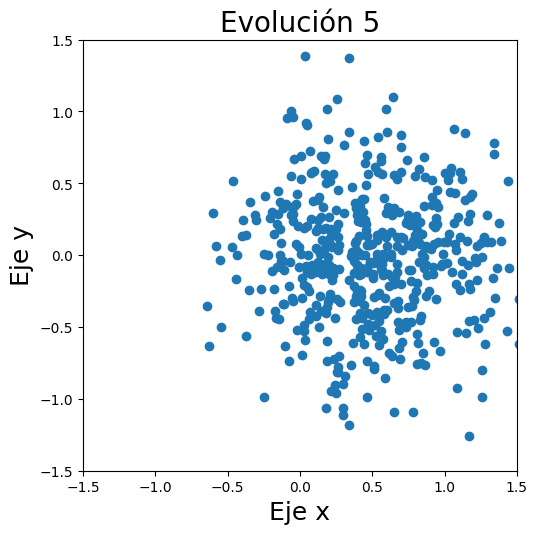

Posición de las parículas despues de 6 evoluciones [0.2607359366018982, 0.42498938101198025, 1.0619441516018517, 0.5038034797074701, 0.5386576288914375, 1.2590965521944264, 0.28190977836011305, 0.8589055792592845, 0.17546448660977274, 0.6406034950306363, -0.05951946675008596, 1.338746916980216, -0.014591647104435057, 0.0191081157352245, 0.54509520718663, 0.06873975411361499, 0.9486776330962354, 0.9989952506276961, 0.7074034189629247, 0.6579920841436827, 1.358732232338535, 0.1781943586493804, 0.7924159468599815, 0.0799437285726502, 1.309154884101946, 0.576774579755451, 0.8076314732145121, 0.3671112736868869, 0.4689900613960297, 0.7640282718107048, -0.3506927763240978, -0.3538210632753419, -0.1360636295096509, 0.9276807585143453, 0.3144692802587908, 0.4527291632946042, 0.7124180373793093, 1.0344750899227457, 0.8740524719639954, 0.7274901105729777, 0.821328462927775, 0.4178552927487482, 1.115111546235027, 0.20571689507080215, 0.43992450324844357, 0.7992899591596094, 0.7354356455074791, 1.

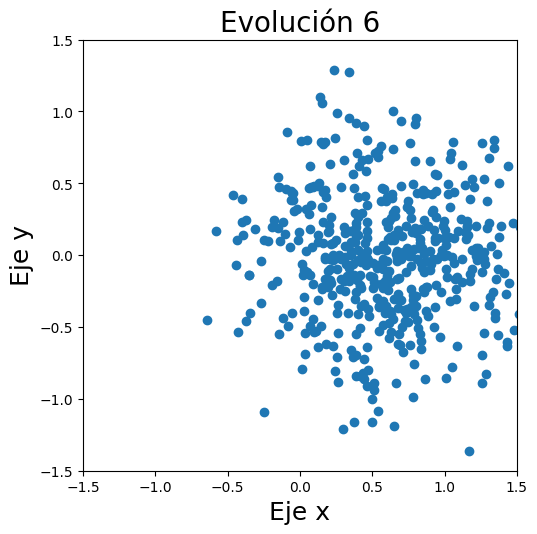

Posición de las parículas despues de 7 evoluciones [0.2607359366018982, 0.42498938101198025, 1.261944151601852, 0.70380347970747, 0.5386576288914375, 1.4590965521944266, 0.48190977836011306, 0.8589055792592845, 0.3754644866097727, 0.6406034950306363, 0.14048053324991405, 1.5387469169802162, -0.014591647104435057, 0.0191081157352245, 0.54509520718663, 0.06873975411361499, 1.1486776330962356, 1.1989952506276962, 0.7074034189629247, 0.8579920841436827, 1.358732232338535, 0.1781943586493804, 0.9924159468599815, 0.0799437285726502, 1.5091548841019462, 0.776774579755451, 0.8076314732145121, 0.3671112736868869, 0.6689900613960297, 0.7640282718107048, -0.3506927763240978, -0.3538210632753419, 0.06393637049034911, 1.1276807585143453, 0.5144692802587908, 0.6527291632946042, 0.9124180373793093, 1.234475089922746, 0.8740524719639954, 0.7274901105729777, 1.021328462927775, 0.4178552927487482, 1.115111546235027, 0.20571689507080215, 0.43992450324844357, 0.9992899591596094, 0.7354356455074791, 1.8825

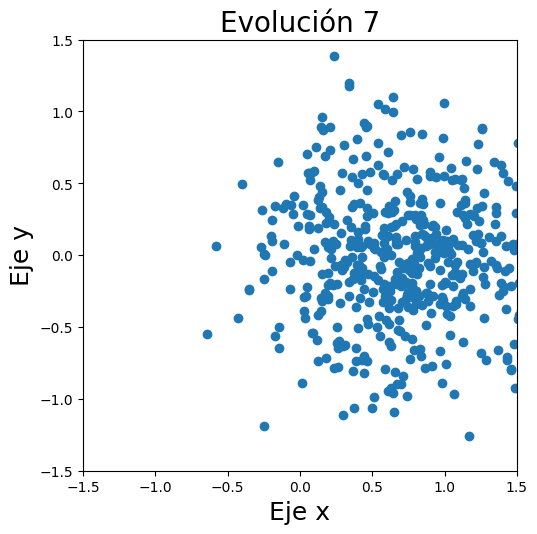

Posición de las parículas despues de 8 evoluciones [0.46073593660189816, 0.42498938101198025, 1.461944151601852, 0.70380347970747, 0.7386576288914375, 1.6590965521944268, 0.48190977836011306, 0.8589055792592845, 0.3754644866097727, 0.8406034950306362, 0.14048053324991405, 1.5387469169802162, -0.014591647104435057, 0.2191081157352245, 0.7450952071866299, 0.268739754113615, 1.3486776330962358, 1.3989952506276964, 0.9074034189629246, 1.0579920841436827, 1.358732232338535, 0.37819435864938045, 0.9924159468599815, 0.0799437285726502, 1.7091548841019464, 0.9767745797554509, 1.0076314732145122, 0.5671112736868869, 0.6689900613960297, 0.7640282718107048, -0.1506927763240978, -0.3538210632753419, 0.06393637049034911, 1.1276807585143453, 0.5144692802587908, 0.8527291632946041, 0.9124180373793093, 1.234475089922746, 1.0740524719639954, 0.9274901105729777, 1.021328462927775, 0.4178552927487482, 1.3151115462350271, 0.20571689507080215, 0.43992450324844357, 0.9992899591596094, 0.935435645507479, 1.8

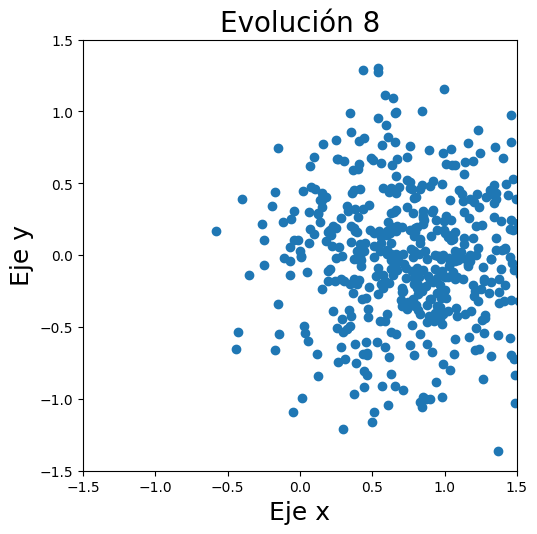

Posición de las parículas despues de 9 evoluciones [0.6607359366018981, 0.42498938101198025, 1.461944151601852, 0.90380347970747, 0.9386576288914374, 1.859096552194427, 0.48190977836011306, 0.8589055792592845, 0.3754644866097727, 1.0406034950306362, 0.34048053324991406, 1.5387469169802162, -0.014591647104435057, 0.41910811573522455, 0.9450952071866299, 0.268739754113615, 1.548677633096236, 1.3989952506276964, 1.1074034189629247, 1.0579920841436827, 1.358732232338535, 0.5781943586493804, 0.9924159468599815, 0.0799437285726502, 1.9091548841019466, 1.176774579755451, 1.2076314732145124, 0.7671112736868868, 0.8689900613960296, 0.9640282718107047, 0.049307223675902206, -0.15382106327534192, 0.2639363704903491, 1.3276807585143455, 0.5144692802587908, 1.052729163294604, 1.1124180373793093, 1.434475089922746, 1.2740524719639956, 0.9274901105729777, 1.021328462927775, 0.4178552927487482, 1.5151115462350273, 0.4057168950708021, 0.43992450324844357, 1.1992899591596096, 0.935435645507479, 1.882507

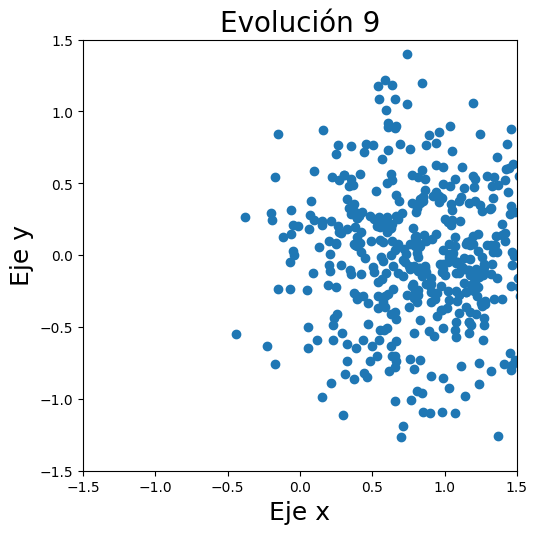

Posición de las parículas despues de 10 evoluciones [0.8607359366018981, 0.6249893810119802, 1.461944151601852, 1.10380347970747, 0.9386576288914374, 2.059096552194427, 0.48190977836011306, 0.8589055792592845, 0.3754644866097727, 1.0406034950306362, 0.34048053324991406, 1.7387469169802163, 0.18540835289556495, 0.41910811573522455, 1.14509520718663, 0.268739754113615, 1.548677633096236, 1.3989952506276964, 1.1074034189629247, 1.0579920841436827, 1.358732232338535, 0.5781943586493804, 0.9924159468599815, 0.2799437285726502, 2.1091548841019465, 1.176774579755451, 1.4076314732145125, 0.7671112736868868, 1.0689900613960297, 0.9640282718107047, 0.049307223675902206, -0.15382106327534192, 0.2639363704903491, 1.5276807585143457, 0.5144692802587908, 1.052729163294604, 1.3124180373793095, 1.6344750899227463, 1.4740524719639958, 1.1274901105729778, 1.021328462927775, 0.6178552927487482, 1.7151115462350275, 0.6057168950708021, 0.6399245032484435, 1.1992899591596096, 1.1354356455074792, 2.082507508

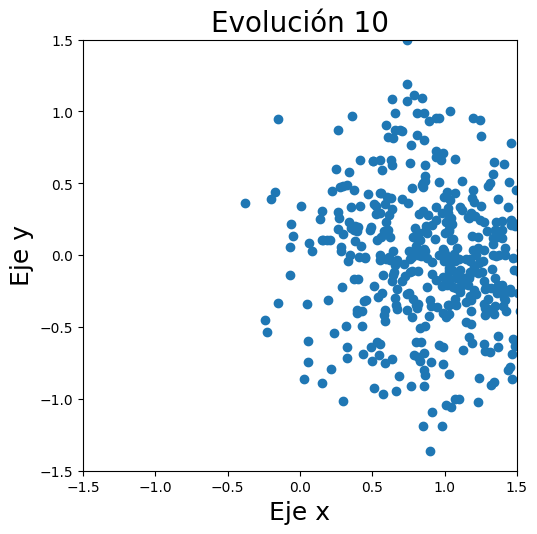

In [6]:
#Experimento 2 (con corriente)
graficadora_de_evolucion(500,1,.1,.5,.5,1,0,10)

## Segunda simulacion (simulación bolas de billar)

In [8]:
n_particles = 24 #Declaramos el numero de particulas que queremos simular
r = np.random.random((2,n_particles))
#Creamos un array (true,false) para separar a la que estan a la izquierda y a las que estan a la derecha (esto nos servira mas adelante)
ixr = r[0]>0.5  #estas particulas estan a la derecha 
ixl = r[0]<=0.5 #estas particulas estan a la izquierda

#Este es un array para identificar la primera particula (La primera particula sera la browniana) (esto nos servira mas adelante)
ifirst= np.full(n_particles,False); 
ifirst[0]=True 

for i in range (r[0].size):
  if .5 < r[0][i]:
    r[0][i]=r[0][i]+0.5

#Le cambiamos las cordenadas a la paricula browniana para que comience el centro
r[0][0]=.75
r[1][0]=.5

In [9]:
#Esto de aqui nos sive para numerar todas las particulas (esto tambien sera de mas utilidad mas adelante)
ids = np.arange(n_particles) 
ids #Imprimimos el resultado

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

(0.0, 1.0)

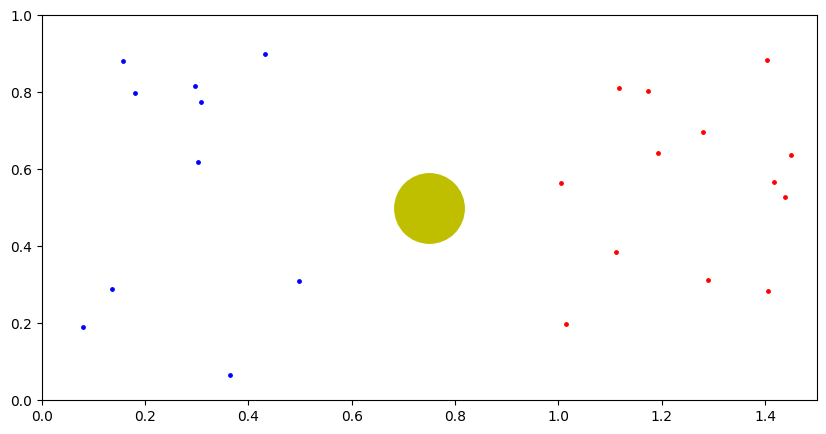

In [10]:
#Imprimimos la configuracion inicial
plt.figure(figsize=(10,5))#Declaramos el tamño inicila para ver masomenos como se miraria
plt.scatter(r[0][ixr],r[1][ixr], color='r', s=6) #A algunas particulas las pondremos en color rojo
plt.scatter(r[0][ixl],r[1][ixl], color='b', s=6) #Y otras particulas en color azul
plt.scatter(r[0][ifirst],r[1][ifirst], color='y', s=2500) #A la particula browniana le metemos un color distnto (Amarillo como el polen)
plt.xlim(0,1.5) #colocamos los limites
plt.ylim(0,1) 

In [11]:
v = np.zeros((2,n_particles)) #Creamos un vector de ceros para guardar las velocidades
v[0][ixr] = -500 #A las paticulas rojas le ponemos una velocidad de -500u
v[0][ixl] = 500 #A las paticulas rojas le ponemos una velocidad de 500u
v[0][ifirst] = 0 #a la particula browniana no le agregamos una velocidad

In [12]:
ids_pairs = np.asarray(list(combinations(ids,2)))#Creamos un lista que me es una combinacion con todas las posibles combinaciones de todas las particulas y lo converitmos en un array
ids_pairs #visualizamos

array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0,  8],
       [ 0,  9],
       [ 0, 10],
       [ 0, 11],
       [ 0, 12],
       [ 0, 13],
       [ 0, 14],
       [ 0, 15],
       [ 0, 16],
       [ 0, 17],
       [ 0, 18],
       [ 0, 19],
       [ 0, 20],
       [ 0, 21],
       [ 0, 22],
       [ 0, 23],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 1, 13],
       [ 1, 14],
       [ 1, 15],
       [ 1, 16],
       [ 1, 17],
       [ 1, 18],
       [ 1, 19],
       [ 1, 20],
       [ 1, 21],
       [ 1, 22],
       [ 1, 23],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 2, 11],
       [ 2, 12],
       [ 2, 13],
       [ 2, 14],
       [ 2, 15],
       [ 2, 16

In [13]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)
x_pairs = np.asarray(list(combinations(r[0],2))) #Creamos un lista que me es una combinacion con todas las posibles combinaciones de todas las cordenada x de cada particulas y lo converitmos en un array
x_pairs

array([[0.75      , 1.17293635],
       [0.75      , 0.30260529],
       [0.75      , 0.29757759],
       [0.75      , 0.36394623],
       [0.75      , 0.30833551],
       [0.75      , 0.0805766 ],
       [0.75      , 1.19307878],
       [0.75      , 0.15750188],
       [0.75      , 1.27896826],
       [0.75      , 1.45087073],
       [0.75      , 0.43287425],
       [0.75      , 1.01511007],
       [0.75      , 1.40519895],
       [0.75      , 1.11764279],
       [0.75      , 1.00447132],
       [0.75      , 1.29045277],
       [0.75      , 1.43827481],
       [0.75      , 0.17994374],
       [0.75      , 1.11099951],
       [0.75      , 1.41679404],
       [0.75      , 0.49772983],
       [0.75      , 0.13692056],
       [0.75      , 1.40398026],
       [1.17293635, 0.30260529],
       [1.17293635, 0.29757759],
       [1.17293635, 0.36394623],
       [1.17293635, 0.30833551],
       [1.17293635, 0.0805766 ],
       [1.17293635, 1.19307878],
       [1.17293635, 0.15750188],
       [1.

In [14]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)

dx_pairs = np.diff(x_pairs, axis=1).ravel() #Calculamos la diferencia entre cada par de particulas, Este sera un array de (ids_pairs.size)pero con el ravel lo tranformamos en una matriz de 1-D 
dx_pairs

array([ 4.22936351e-01, -4.47394711e-01, -4.52422408e-01, -3.86053774e-01,
       -4.41664495e-01, -6.69423402e-01,  4.43078776e-01, -5.92498117e-01,
        5.28968259e-01,  7.00870731e-01, -3.17125752e-01,  2.65110068e-01,
        6.55198954e-01,  3.67642785e-01,  2.54471316e-01,  5.40452766e-01,
        6.88274812e-01, -5.70056262e-01,  3.60999513e-01,  6.66794036e-01,
       -2.52270171e-01, -6.13079438e-01,  6.53980260e-01, -8.70331062e-01,
       -8.75358760e-01, -8.08990125e-01, -8.64600846e-01, -1.09235975e+00,
        2.01424244e-02, -1.01543447e+00,  1.06031907e-01,  2.77934380e-01,
       -7.40062103e-01, -1.57826284e-01,  2.32262603e-01, -5.52935661e-02,
       -1.68465036e-01,  1.17516415e-01,  2.65338461e-01, -9.92992613e-01,
       -6.19368382e-02,  2.43857685e-01, -6.75206522e-01, -1.03601579e+00,
        2.31043909e-01, -5.02769754e-03,  6.13409369e-02,  5.73021602e-03,
       -2.22028691e-01,  8.90473487e-01, -1.45103406e-01,  9.76362969e-01,
        1.14826544e+00,  

In [15]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)

#Hacemos exactamente lo mismo para la cordenada en Y
y_pairs = np.asarray(list(combinations(r[1],2)))
dy_pairs = np.diff(y_pairs, axis=1).ravel()

#Ahora calculamos la distancia total entre todas las posible pares de particulas
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2) #Calculamos la distancia entre dos particulas
d_pairs

array([0.52041199, 0.46318833, 0.55141944, 0.58022687, 0.52004225,
       0.73805252, 0.4654813 , 0.70422363, 0.5646564 , 0.71403516,
       0.51080642, 0.40117032, 0.69016997, 0.48094293, 0.26244509,
       0.57185313, 0.68880034, 0.64354052, 0.37869222, 0.67023793,
       0.31554071, 0.6482642 , 0.75864021, 0.88942727, 0.87544105,
       1.09395811, 0.86507675, 1.25311107, 0.16182917, 1.01837918,
       0.14970289, 0.32412389, 0.74641853, 0.6245959 , 0.56964702,
       0.0557143 , 0.29243681, 0.50401696, 0.38310125, 0.9930033 ,
       0.42220513, 0.33892604, 0.83590376, 1.15647143, 0.24491979,
       0.19538399, 0.5564715 , 0.15473134, 0.48457681, 0.89076393,
       0.29836528, 0.97944475, 1.14838479, 0.30929221, 0.82759488,
       1.15289518, 0.83692479, 0.70407442, 1.03439585, 1.13947276,
       0.21675439, 0.84166965, 1.11540457, 0.36584297, 0.36978376,
       1.13270968, 0.75133664, 0.04209206, 0.66257984, 0.91197819,
       0.15458471, 0.98842144, 1.16706525, 0.15988873, 0.94589

In [16]:
#Esta casilla no se necesita(NO SE NECESITA, SOLO ES PEDAGOGIA)

#Una vez hecho todo esto agregamos los primeros datos 

radius = 0.01
mc=0.01

radiusG = .25
mg=.25

ids_pairs_collidec1 = ids_pairs[d_pairs <= 2*radius] #esta es una lista de los pares que colicionan, considerando como colision cuando se acercan mas o igual a (2*radio)
ids_pairs_collideg1 = ids_pairs[d_pairs <= radius+radiusG] #esta es una lista de los pares que colicionan, considerando como colision cuando se acercan mas o igual a (radius + radioG)

Como algunas coliciones son entre dos particulas de distinta masa usaremos diferentes formula para calcularlo su velocidad resultante despues de la colision

Pero las unicas colisiones que son con la masa grande son las que inician con cero, entonces

Queremos filtrar los array que inicien con ceros de ids_pairs_collidec1 esto se guardara en ids_pairs_collidec2
Queremos tener tambien solo arrays que inicien con ceros en ids_pairs_collideg1 esto lo guardaremos en ids_pairs_collideg2

In [18]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)

#AL PRINCIPIO ESTE NUMERO TIENE QUE SER CERO, SI NO ES ASI NO SE PUEDE CONFIAR EN EL RESULTADO
#esto sirve para contar cuantos array inician con ceros en ids_pairs_collidec1
contadorc = 0
for i in range (len(ids_pairs_collidec1)):
  if ids_pairs_collidec1[i][0]==0:
    contadorc = contadorc + 1

contadorc

0

In [19]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)

#Aca creamos ids_pairs_collidec2
ids_pairs_collidec2=ids_pairs_collidec1[contadorc:len(ids_pairs_collidec1)]
ids_pairs_collidec2

array([], shape=(0, 2), dtype=int64)

In [20]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)

#AL PRINCIPIO ESTE NUMERO TIENE QUE SER CERO, SI NO ES ASI NO SE PUEDE CONFIAR EN EL RESULTADO
#esto sirve para contar cuantos array inician con ceros en ids_pairs_collideg1
contadorg = 0
for i in range (len(ids_pairs_collideg1)):
  if ids_pairs_collideg1[i][0]==0:
    contadorg = contadorg + 1

contadorg    

0

In [21]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)

#Aca creamos ids_pairs_collideg2
ids_pairs_collideg2=ids_pairs_collideg1[0:contadorg]
ids_pairs_collideg2

array([], shape=(0, 2), dtype=int64)

In [22]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)
v1c = v[:,ids_pairs_collidec2[:,0]] # Son las velocidades x y y de las particulas que colisionaron con id izquierdo (primera columna) 
v2c = v[:,ids_pairs_collidec2[:,1]] # Son las velocidades x y y de las particulas que colisionaron con id derecho (segunda columna)
r1c = r[:,ids_pairs_collidec2[:,0]] # Es la posicion x y y de las particualas que colicionaron con id izquierdo (primera columna)
r2c = r[:,ids_pairs_collidec2[:,1]] # Es la posicion x y y de las particualas que colicionaron con id derecho (segunda columna)

v1g = v[:,ids_pairs_collideg2[:,0]] # Es la velocidad de la particula grande x y y pero (n coliciones veces)
v2g = v[:,ids_pairs_collideg2[:,1]] # Es la velocidad de cada particula que choco con la particula grande
r1g = r[:,ids_pairs_collideg2[:,0]] # Es la posicion x y y de la particuala grande (n coliciones veces)
r2g = r[:,ids_pairs_collideg2[:,1]] # Es la posicion x y y de la particulas que chocaron con las particula grande 

In [23]:
#SE CREA UNA FUNCION MAS ABAJO (NO SE NECESITA, SOLO ES PEDAGOGIA)

#arroba es una multiplicacion de matrices, 
#diag filtra solo la diagonal 
#T es para la transpuesta y asi podemos multiplicar las matrices 
#np.sum((r1g-r2g)**2, axis=0) es un array que contiene la suma de cada i-esima columna (es la suma de cada columna)

#se calcula la velocidad de cada particula chiquitas depues de cada colision 
v1cnew = v1c - np.diag((v1c-v2c).T@(r1c-r2c))/np.sum((r1c-r2c)**2, axis=0) * (r1c-r2c) 
v2cnew = v2c - np.diag((v2c-v1c).T@(r2c-r1c))/np.sum((r2c-r1c)**2, axis=0) * (r2c-r1c)

v1gnew = v1g -(2*mg/(mg+mc))*np.diag((v1g-v2g).T@(r1g-r2g))/np.sum((r1g-r2g)**2, axis=0) * (r1g-r2g) #se calcula la velocidad de la particula browniana despues de cada colision
v2gnew = v2g -(2*mc/(mg+mc))*np.diag((v2g-v1g).T@(r2g-r1g))/np.sum((r2g-r1g)**2, axis=0) * (r2g-r1g) #se calcula la velocidad de la particula chiquita despues de colisionar con la particula grande

In [24]:
#Todo lo anterior se resume en las siguientes funciones: 

def get_delta_pairs(x):
    return np.diff(np.asarray(list(combinations(x,2))), axis=1).ravel() #calcula la distancia entre dos particulas en una dimencion

def get_deltad_pairs(r):
    return np.sqrt(get_delta_pairs(r[0])**2 + get_delta_pairs(r[1])**2) #calcula la distancia entre dos particulas total (2 dimenciones)

def compute_new_v(v1c, v2c, r1c, r2c, v1g, v2g, r1g, r2g, mc, mg): #Esta funcion me crea los nuevos valores de velocidad
    v1cnew = v1c - np.diag((v1c-v2c).T@(r1c-r2c))/np.sum((r1c-r2c)**2, axis=0) * (r1c-r2c)
    v2cnew = v2c - np.diag((v2c-v1c).T@(r2c-r1c))/np.sum((r2c-r1c)**2, axis=0) * (r2c-r1c)

    v1gnew = v1g -(2*mc/(mg+mc))*np.diag((v1g-v2g).T@(r1g-r2g))/np.sum((r1g-r2g)**2, axis=0) * (r1g-r2g) #CUIDADO CON EL FACTOR SI ESTA MAL AQUI PUEDE SER EL PORQUE
    v2gnew = v2g -(2*mg/(mg+mc))*np.diag((v2g-v1g).T@(r2g-r1g))/np.sum((r2g-r1g)**2, axis=0) * (r2g-r1g) #CUIDADO CON EL FACTOR SI ESTA MAL AQUI PUEDE SER EL PORQUE
    return v1cnew, v2cnew, v1gnew, v2gnew 

def Nataly_q(a): #esta funcion te devuelve los mismos pares pero sin los ceros iniciales
    contador = 0
    for i in range (len(a)):
        if a[i][0]==0:
          contador = contador + 1
    return a[contador:len(a)]

def Nataly_d(a): #esta funcion te devuelve los mismos pares pero solos los que incluyen los ceros iniciales
    contador = 0
    for i in range (len(a)):
        if a[i][0]==0:
          contador = contador + 1
    return a[0:contador]    

def motion(r, v, id_pairs, ts, dt, d_cutoff, d_grande, mc, mg):
    rs = np.zeros((ts, r.shape[0], r.shape[1])) #creamos ts matrices r (esto se hace para guardar todas las posiciones por calcular)
    vs = np.zeros((ts, v.shape[0], v.shape[1])) #creamos ts matrices v (esto se hace para guardar todas las velocidades por calcular)
    # Valores iniciales
    rs[0] = r.copy() #hacemos una copia de la primera matriz (valores inicales) 
    vs[0] = v.copy() #hacemos una copia de la primera matriz (valores inicales) 
    
    for i in range(1,ts):

        ic = id_pairs[get_deltad_pairs(r) < d_cutoff] #esta es una lista de las particulas que colicionan para esta condicon (2r)
        ig = id_pairs[get_deltad_pairs(r) < d_grande] #esta es una lista de las particulas que colicionan para esta condicon (d_grande) 

        icc=Nataly_q(ic) #aqui quite todas las colisiones que incluyen a la particula grande 
        igg=Nataly_d(ig) #aqui solo deje las colisiones que tienen que ver con la particula grande 
        
        v[:,icc[:,0]], v[:,icc[:,1]],  v[:,igg[:,0]], v[:,igg[:,1]]= compute_new_v(v[:,icc[:,0]],  v[:,icc[:,1]],  r[:,icc[:,0]],  r[:,icc[:,1]], v[:,igg[:,0]],  v[:,igg[:,1]],  r[:,igg[:,0]],  r[:,igg[:,1]], mc, mg) #Estoy uzando la funcion compute new        

        v[0,r[0]>1.5] = -np.abs(v[0,r[0]>1.5]) #Las siguientes lineas evitan que las particulas se salgan del cuadrado 1X1 cambie en este reglon un 1 por un 2
        v[0,r[0]<0] = np.abs(v[0,r[0]<0]) 
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        r = r + v*dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

A crear simulaciones!!!!!

In [25]:
#Ajusta tus parametros
radius = 0.01
mc=0.01
radiusG = .07
mg=.05
#Crea tu simulaciones
rs, vs = motion(r, v, ids_pairs, 1000, 0.000008, 2*radius, radius+radiusG, mc, mg)

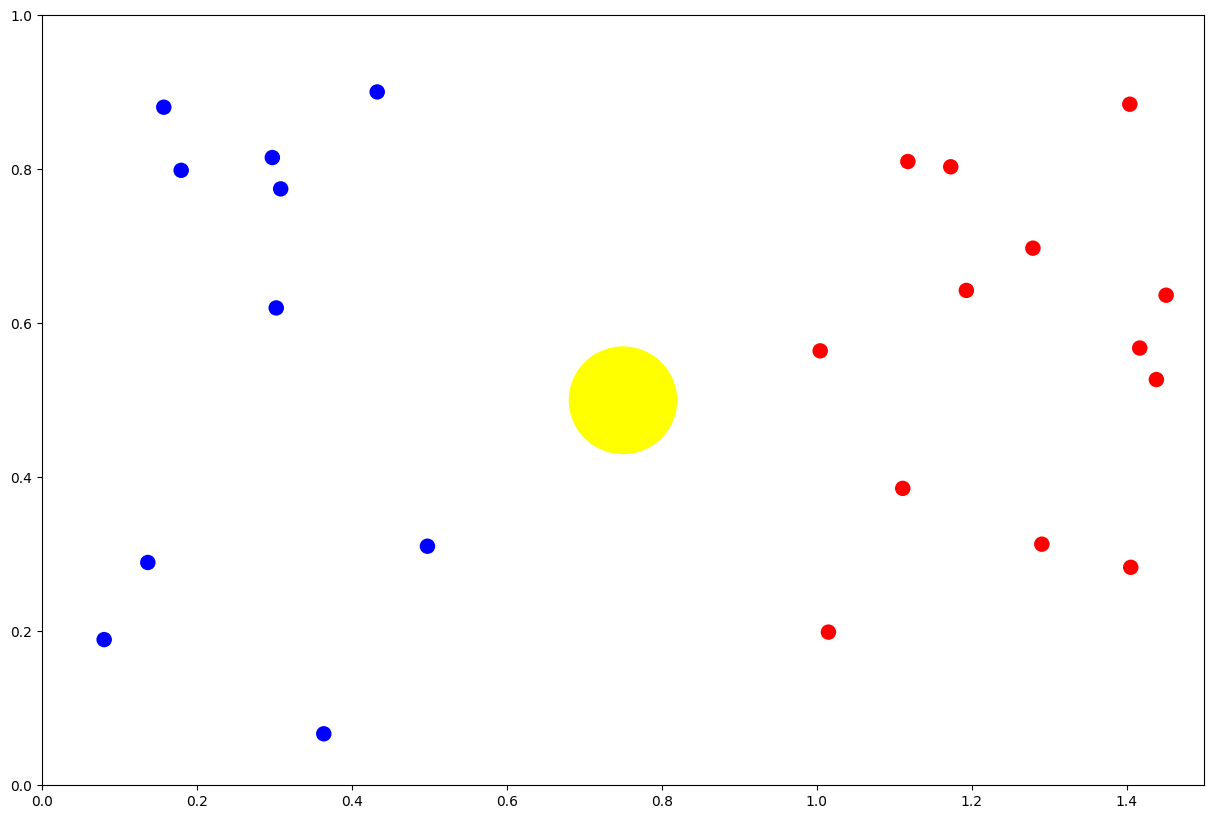

In [26]:
#GRAFICA
fig, ax = plt.subplots(1,1,figsize=(15,10)) #declaramos fig y ax
xred, yred = rs[0][0][ixr], rs[0][1][ixr] #guardamos los cordenadas de las particulas rojas
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl] #guardamos las cordenadas de las pariculas azules
xyellow, yyellow=rs[0][0][ifirst],rs[0][1][ifirst] #guardamos las cordenadas de las particulas amarillas
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)] #los dibujamos como si fuera un circulo zip lo que hace es juntarme las cordenadas x y y (x1,y1),(x2,y2),etc...
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
circles_yellow = [plt.Circle((xi, yi), radius=radiusG, linewidth=0) for xi,yi in zip(xyellow,yyellow)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')#patchcollection sirve para graficar con mas velocidad, se usa en animaciones
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
cyellow = matplotlib.collections.PatchCollection(circles_yellow, facecolors='yellow')
ax.add_collection(cred) #agregamos los puntitos rojos, azules y la particula browniana
ax.add_collection(cblue)
ax.add_collection(cyellow)
ax.set_xlim(0,1.5)#Declaramos los limites
ax.set_ylim(0,1)
plt.show()

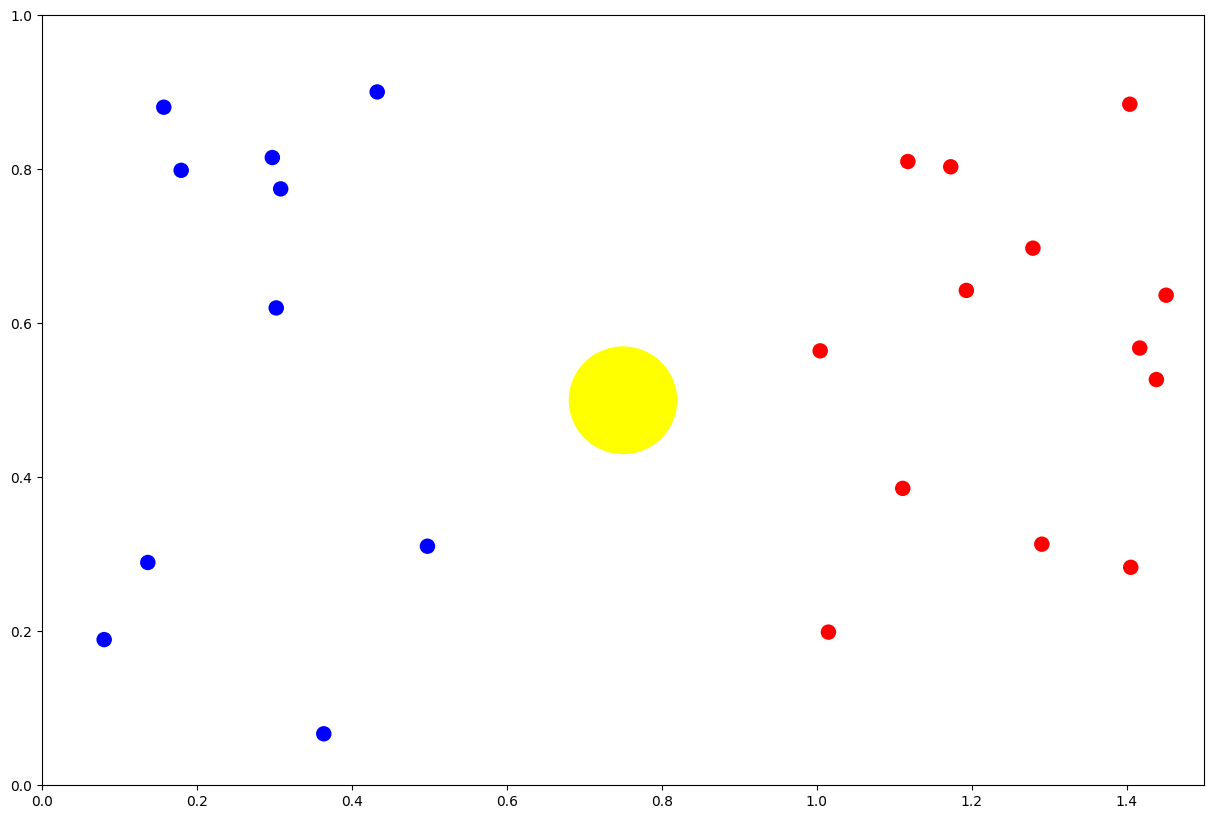

In [27]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

def animate(i):#Definicimos animated para no tener que hacer una animacion cada vez que se necesite
    ax.clear() #reiniciamos el ax
    #esto es exactamente igual a lo que se explico en casillas arriba
    xred, yred = rs[i][0][ixr], rs[i][1][ixr] 
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl] 
    xyellow, yyellow = rs[i][0][ifirst],rs[i][1][ifirst] 
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)] 
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    circles_yellow = [plt.Circle((xi, yi), radius=radiusG, linewidth=0) for xi,yi in zip(xyellow,yyellow)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    cyellow = matplotlib.collections.PatchCollection(circles_yellow, facecolors='yellow')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.add_collection(cyellow)
    ax.set_xlim(0,1.5)
    ax.set_ylim(0,1)
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani1.gif',writer='pillow',fps=30,dpi=100)

Creamos una animación con mas particulas para ver el movimiento Browniano

In [28]:
#Todo esto ya se explico, solo hacemos una nueva animacion
n_particles = 400
r = np.random.random((2,n_particles))
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ifirst= np.full(n_particles,False);
ifirst[0]=True
for i in range (r[0].size):
  if .5 < r[0][i]:
    r[0][i]=r[0][i]+0.5

#Le cambiamos las cordenadas a la paricula browniana para que comience el centro
r[0][0]=.75
r[1][0]=.5
ids = np.arange(n_particles)
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500
v[0][ifirst] = 0
radius = 0.0015
mc=0.0015
radiusG = .07
mg=.05
ts=1000
dt=0.000008
d_cutoff =2*radius
d_grande=radius+radiusG

rs, vs = motion(r, v, ids_pairs, ts, dt, 2*radius, radius+radiusG, mc, mg)

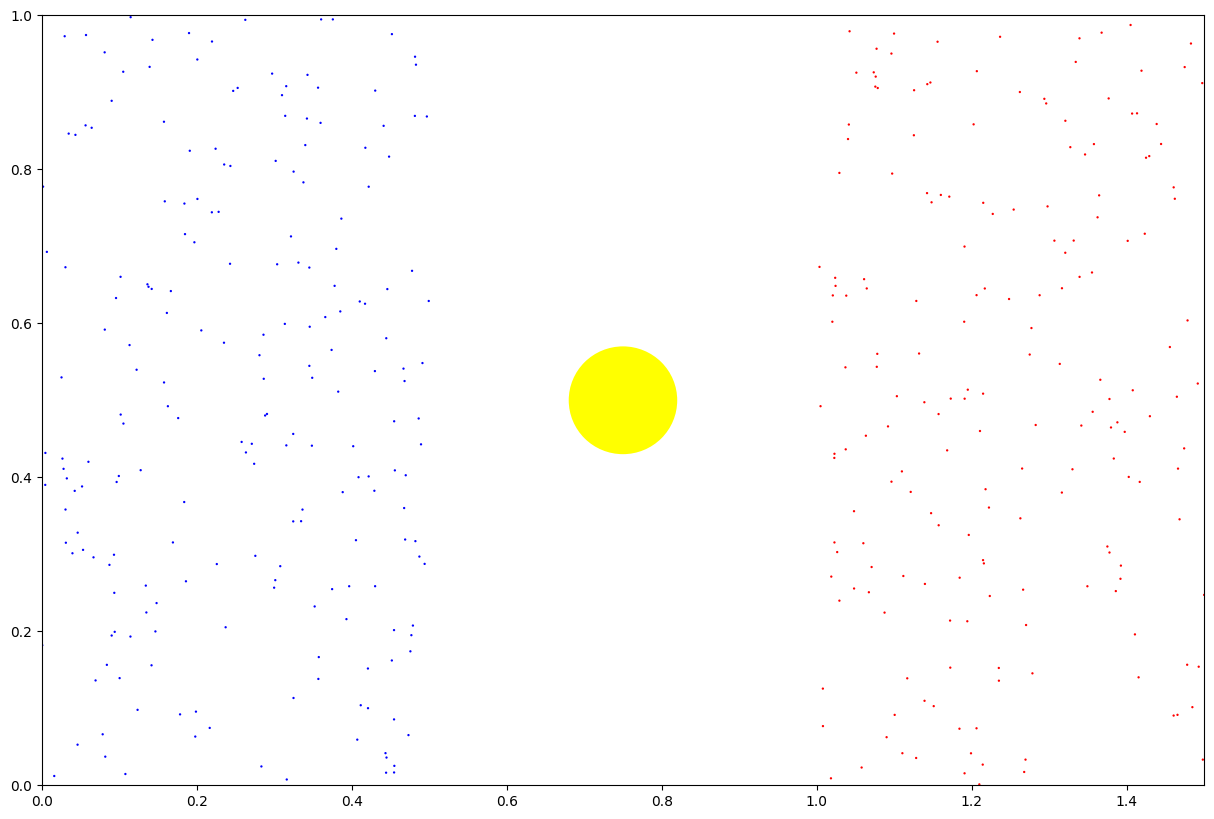

In [29]:
#correr la casilla de animated
fig, ax = plt.subplots(1,1,figsize=(15,10))
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani2.gif',writer='pillow',fps=30,dpi=100)

Text(0, 0.5, '# Particles')

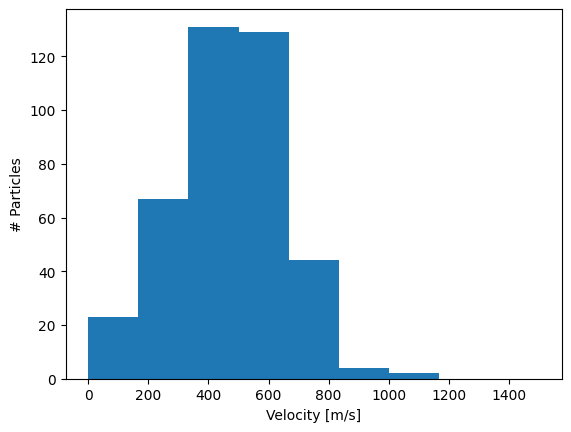

In [30]:
bins = np.linspace(0,1500,10) #se genera un array con 10 puntos de 0 a 1500 todos a una misma distancia
plt.figure() 
plt.hist(np.sqrt(np.sum(vs[500]**2, axis=0)), bins=bins) #se suma la velocidades en x y y al cuadrado y se calcula la raiz para saber su magnitud 
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

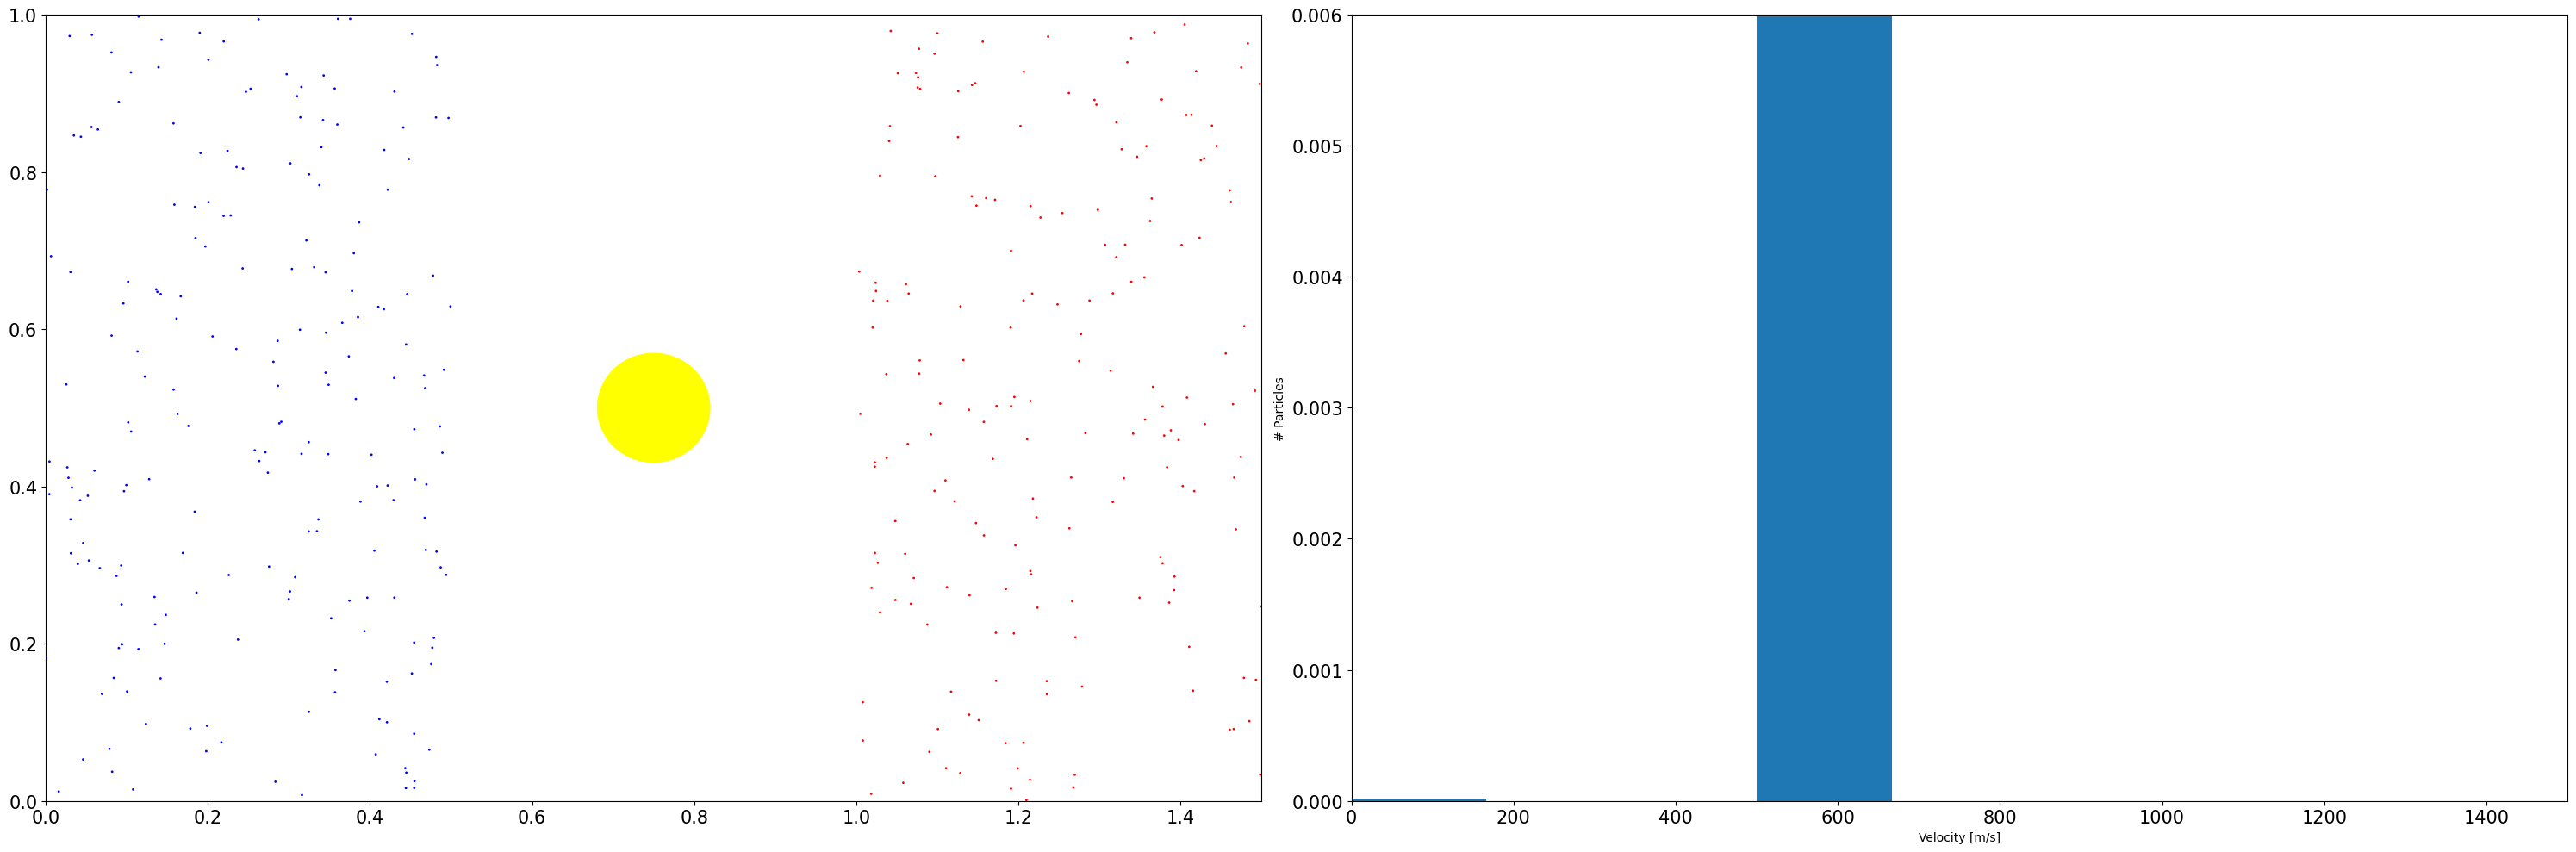

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(30,10))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    xyellow, yyellow = rs[i][0][ifirst],rs[i][1][ifirst]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    circles_yellow = [plt.Circle((xi, yi), radius=radiusG, linewidth=0) for xi,yi in zip(xyellow,yyellow)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    cyellow = matplotlib.collections.PatchCollection(circles_yellow, facecolors='yellow')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.add_collection(cyellow)
    ax.set_xlim(0,1.5)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)#cambia los parametros del eje x 
    ax.tick_params(axis='y', labelsize=15)#cambia los parametros del eje y
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('aniHisto.gif',writer='pillow',fps=30,dpi=100)

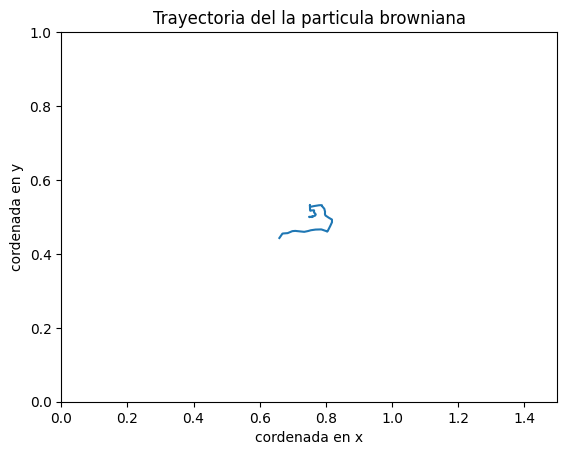

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x=rs[:,0][:,0]
y=rs[:,1][:,0]

plt.plot(x, y)
plt.title("Trayectoria del la particula browniana")
plt.xlim(0,1.5)
plt.ylim(0,1)
plt.xlabel("cordenada en x")
plt.ylabel("cordenada en y")
plt.show()

Este segundo modelo resulta considerablemente más fascinante; sin embargo, su costo computacional es significativamente elevado. Por otro lado, se puede apreciar que las partículas brownianas siguen una trayectoria zigzagueante, tal y como lo describió Robert Brown. 